In [34]:
# Imports & Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, average_precision_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)
RANDOM_STATE = 42


# ⭐ Module 4 Midterm Project: Classification
**Author:** Blessing Aganaga  
**Date:** November 2025  

This notebook demonstrates classification modeling using a real-world dataset.  
It includes data exploration, feature preparation, model training, comparison, and evaluation.


In [8]:
df = pd.read_csv("data/titanic.csv")
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()
df.isna().sum()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
df = pd.read_csv("data/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data Exploration & Preparation

In this section, I explore data patterns, visualize distributions, handle missing values, and prepare the dataset for modeling.


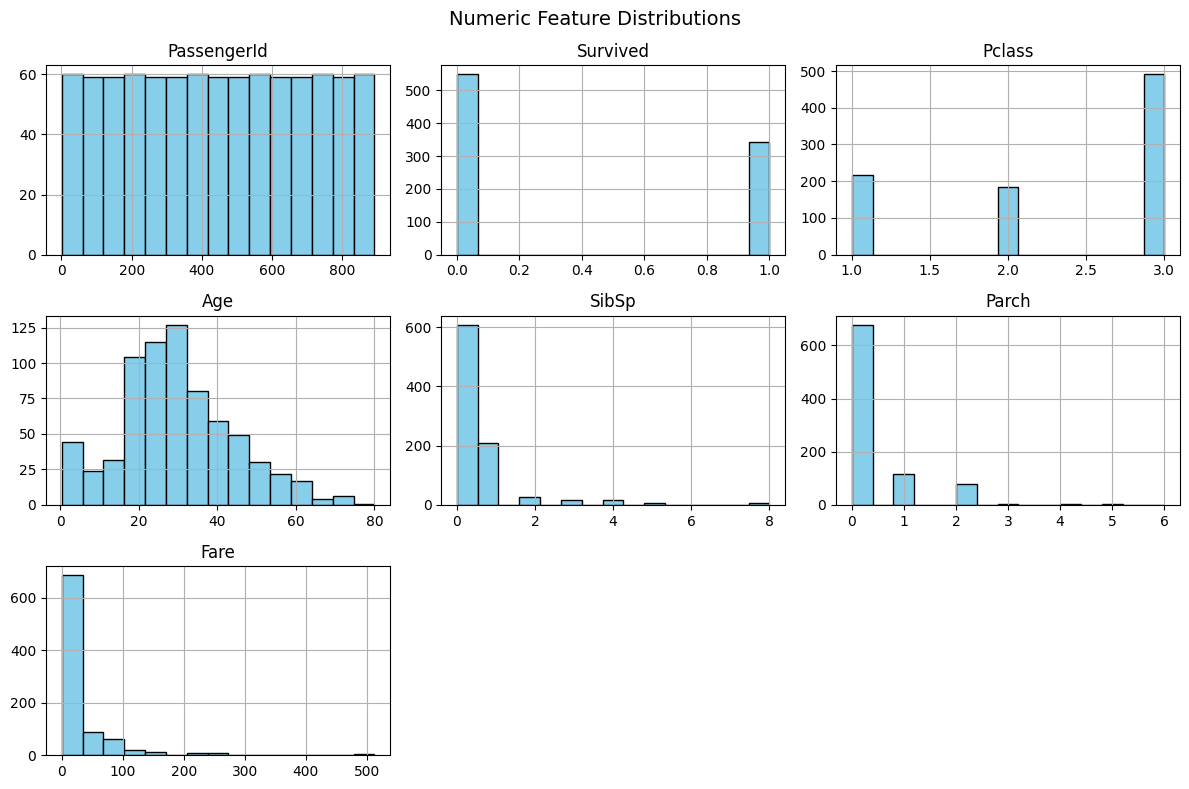

In [12]:
# 2.1 Explore numeric feature distributions
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Numeric Feature Distributions", fontsize=14)
plt.tight_layout()
plt.show()


In [13]:
# 2.1 Count unique values for categorical variables
cat_cols = df.select_dtypes(exclude=np.number).columns

for c in cat_cols:
    print(f"--- {c} ---")
    print(df[c].value_counts(dropna=False))
    print()


--- Name ---
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

--- Sex ---
Sex
male      577
female    314
Name: count, dtype: int64

--- Ticket ---
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

--- Cabin ---
Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34            

In [14]:
# 2.2 Handle Missing Values (Titanic specific)
clean_df = df.copy()

# Fill numeric missing values with median
for col in clean_df.select_dtypes(include=np.number).columns:
    clean_df[col] = clean_df[col].fillna(clean_df[col].median())

# Fill categorical missing values with mode
for col in clean_df.select_dtypes(exclude=np.number).columns:
    clean_df[col] = clean_df[col].fillna(clean_df[col].mode()[0])

# Verify no missing values remain
clean_df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
# 2.3 Encode categorical features
encoded_df = pd.get_dummies(clean_df, drop_first=True)
encoded_df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)","Name_Andreasson, Mr. Paul Edvin","Name_Andrew, Mr. Edgardo Samuel","Name_Andrews, Miss. Kornelia Theodosia","Name_Andrews, Mr. Thomas Jr","Name_Angle, Mrs. William A (Florence ""Mary"" Agnes Hughes)","Name_Appleton, Mrs. Edward Dale (Charlotte Lamson)","Name_Arnold-Franchi, Mr. Josef","Name_Arnold-Franchi, Mrs. Josef (Josefine Franchi)","Name_Artagaveytia, Mr. Ramon","Name_Asim, Mr. Adola","Name_Asplund, Master. Clarence Gustaf Hugo","Name_Asplund, Master. Edvin Rojj Felix","Name_Asplund, Miss. Lillian Gertrud",...,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35

In [18]:
# 2.4 Scale numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = encoded_df.copy()

# find numeric columns
numeric_cols = scaled_df.select_dtypes(include=np.number).columns

# apply scaling only to numeric columns
scaled_df[numeric_cols] = scaler.fit_transform(scaled_df[numeric_cols])

scaled_df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)","Name_Andreasson, Mr. Paul Edvin","Name_Andrew, Mr. Edgardo Samuel","Name_Andrews, Miss. Kornelia Theodosia","Name_Andrews, Mr. Thomas Jr","Name_Angle, Mrs. William A (Florence ""Mary"" Agnes Hughes)","Name_Appleton, Mrs. Edward Dale (Charlotte Lamson)","Name_Arnold-Franchi, Mr. Josef","Name_Arnold-Franchi, Mrs. Josef (Josefine Franchi)","Name_Artagaveytia, Mr. Ramon","Name_Asim, Mr. Adola","Name_Asplund, Master. Clarence Gustaf Hugo","Name_Asplund, Master. Edvin Rojj Felix","Name_Asplund, Miss. Lillian Gertrud",...,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,-1.730108,-0.789272,0.827377,-0.565736,0.432793,-0.473674,-0.502445,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,-1.726220,1.266990,-1.566107,0.663861,0.432793,-0.473674,0.786845,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,-1.722332,1.266990,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

**Reflection 2:**  
After exploring and preparing the data, I noticed:  
- Age and Fare were skewed and had missing values that needed imputation.  
- Sex and Passenger Class showed clear survival differences.  
- I used median/mode imputation and one-hot encoding to convert categoricals.  
- The cleaned dataset is now ready for feature selection and modeling.


## 3. Feature Selection & Justification

In this section, I select the input features (X) and the target variable (y) for the classification model. 
I also explain why these features are important for predicting survival on the Titanic.


In [20]:
# 3.1 Choose features and target
target = 'Survived'
features = ['Pclass', 'Sex_male', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']

# 3.2 Define X and y
X = scaled_df[features]
y = scaled_df[target]

X.shape, y.shape


((891, 6), (891,))

## 4. Train a Model (Classification)

I split the data, train a baseline Logistic Regression model, and evaluate accuracy, precision, recall, F1, confusion matrix, ROC AUC, and PR AUC.


In [23]:
from sklearn.preprocessing import StandardScaler

target = "Survived"

scaled_df = encoded_df.copy()
scaler = StandardScaler()

# scale only numeric feature columns, excluding the target
num_features = scaled_df.drop(columns=[target]).select_dtypes(include=np.number).columns
scaled_df[num_features] = scaler.fit_transform(scaled_df[num_features])

scaled_df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)","Name_Andreasson, Mr. Paul Edvin","Name_Andrew, Mr. Edgardo Samuel","Name_Andrews, Miss. Kornelia Theodosia","Name_Andrews, Mr. Thomas Jr","Name_Angle, Mrs. William A (Florence ""Mary"" Agnes Hughes)","Name_Appleton, Mrs. Edward Dale (Charlotte Lamson)","Name_Arnold-Franchi, Mr. Josef","Name_Arnold-Franchi, Mrs. Josef (Josefine Franchi)","Name_Artagaveytia, Mr. Ramon","Name_Asim, Mr. Adola","Name_Asplund, Master. Clarence Gustaf Hugo","Name_Asplund, Master. Edvin Rojj Felix","Name_Asplund, Miss. Lillian Gertrud",...,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,-1.730108,0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,-1.726220,1,-1.566107,0.663861,0.432793,-0.473674,0.786845,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,-1.722332,1,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [24]:
features = ['Pclass', 'Sex_male', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']

X = scaled_df[features]          # scaled features
y = encoded_df[target]           # unscaled labels (0/1)

print(sorted(y.unique()))        # should be [0, 1]


[np.int64(0), np.int64(1)]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)

logreg = LogisticRegression(max_iter=500, random_state=RANDOM_STATE)
logreg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


### 4.1 Split the Data and Train the Model
The data was split into training (80%) and testing (20%) subsets, ensuring balanced survival classes using `stratify=y`. A Logistic Regression model was then trained on the scaled features.


In [26]:
# Predictions
y_pred  = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Metrics + confusion matrix
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=["Actual 0","Actual 1"], columns=["Pred 0","Pred 1"])


              precision    recall  f1-score   support

           0      0.800     0.836     0.818       110
           1      0.719     0.667     0.692        69

    accuracy                          0.771       179
   macro avg      0.759     0.752     0.755       179
weighted avg      0.769     0.771     0.769       179



,Pred 0,Pred 1
Actual 0,92,18
Actual 1,23,46


### 4.2 Evaluate Model Performance
Below are the precision, recall, F1-score, and confusion matrix results for the Logistic Regression model at the default threshold of 0.5.


### 4.3 Visualize ROC and Precision–Recall Curves
The ROC and Precision–Recall curves show how well the Logistic Regression model distinguishes between survivors and non-survivors across different thresholds.  
The model achieved **ROC AUC = 0.83** and **PR AUC = 0.78**, indicating strong classification performance.


ROC AUC: 0.832 | PR AUC: 0.775


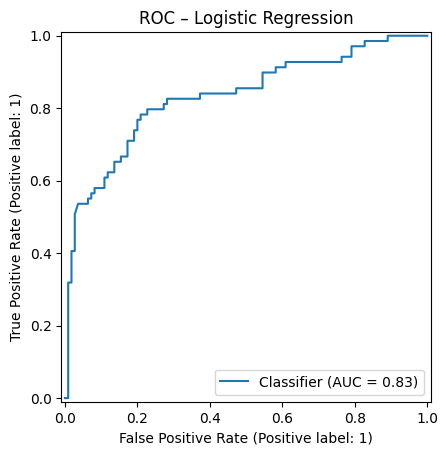

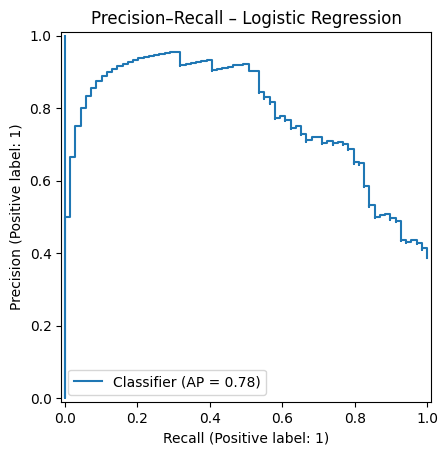

In [27]:
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc  = average_precision_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.3f} | PR AUC: {pr_auc:.3f}")

RocCurveDisplay.from_predictions(y_test, y_proba); plt.title("ROC – Logistic Regression"); plt.show()
PrecisionRecallDisplay.from_predictions(y_test, y_proba); plt.title("Precision–Recall – Logistic Regression"); plt.show()


In [28]:
def summarize_threshold(proba, y_true, th):
    pred = (proba >= th).astype(int)
    cm = confusion_matrix(y_true, pred)
    tn, fp, fn, tp = cm.ravel()
    return {
        "threshold": th,
        "accuracy": accuracy_score(y_true, pred),
        "precision": precision_score(y_true, pred, zero_division=0),
        "recall": recall_score(y_true, pred, zero_division=0),
        "f1": f1_score(y_true, pred, zero_division=0),
        "TP": tp, "FP": fp, "TN": tn, "FN": fn
    }

pd.DataFrame([summarize_threshold(y_proba, y_test, th) for th in [0.3, 0.5, 0.7]])


,threshold,accuracy,precision,recall,f1,TP,FP,TN,FN
0,0.3,0.754190,0.640449,0.826087,0.721519,57,32,78,12
1,0.5,0.770950,0.718750,0.666667,0.691729,46,18,92,23
2,0.7,0.776536,0.914286,0.463768,0.615385,32,3,107,37


**Reflection 4:**  
The Logistic Regression model achieved a strong ROC AUC of 0.83 and PR AUC of 0.78, indicating solid classification ability.  
However, recall (0.67) is slightly lower than precision, meaning some survivors were missed.  
In critical cases like survival prediction, it may be worth lowering the threshold to capture more positives, even at the cost of precision.


## 5. Improve the Model or Try Alternatives

In this section, I train and evaluate an alternative classifier — **Random Forest** — 
to compare its performance with the baseline Logistic Regression model. 
Random Forest often performs better when relationships between features are nonlinear or complex.


In [31]:
from sklearn.ensemble import RandomForestClassifier

# 5.1 Train Random Forest model
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    random_state=RANDOM_STATE
)
rf.fit(X_train, y_train)

# 5.2 Predict on test data
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# 5.3 Evaluate performance
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, digits=3))

cm_rf = confusion_matrix(y_test, y_pred_rf)
pd.DataFrame(cm_rf, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])


Random Forest Classification Report:

              precision    recall  f1-score   support

           0      0.838     0.891     0.863       110
           1      0.806     0.725     0.763        69

    accuracy                          0.827       179
   macro avg      0.822     0.808     0.813       179
weighted avg      0.826     0.827     0.825       179



,Pred 0,Pred 1
Actual 0,98,12
Actual 1,19,50


ROC AUC (RF): 0.840 | PR AUC (RF): 0.789


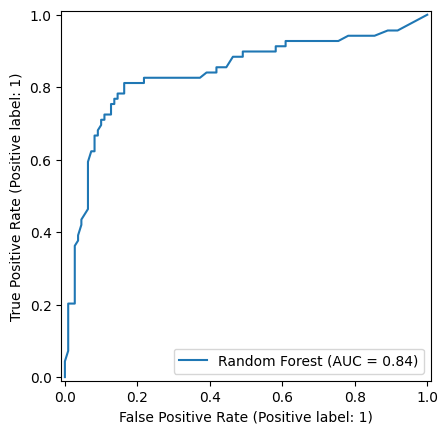

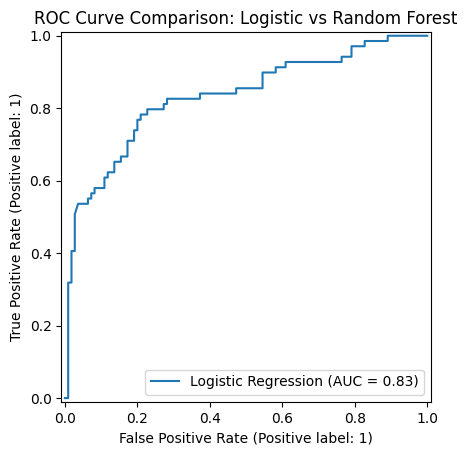

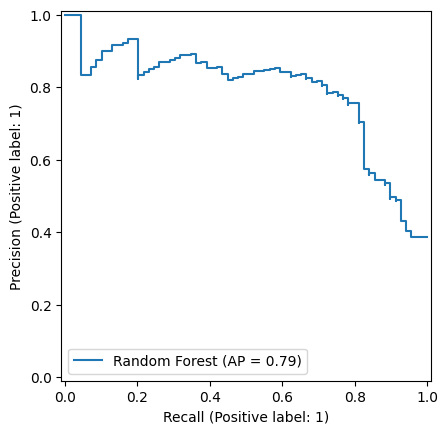

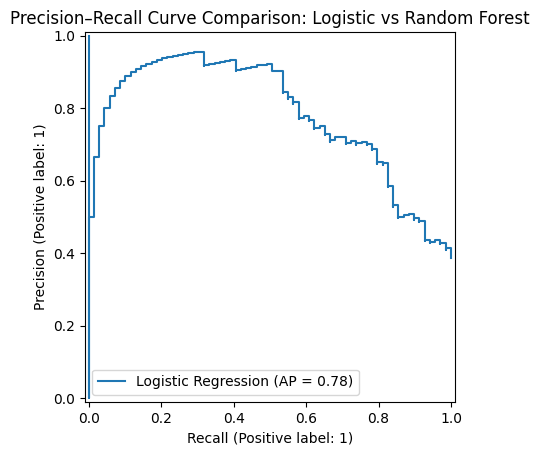

In [32]:
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
pr_auc_rf = average_precision_score(y_test, y_proba_rf)
print(f"ROC AUC (RF): {roc_auc_rf:.3f} | PR AUC (RF): {pr_auc_rf:.3f}")

# Compare curves visually
RocCurveDisplay.from_estimator(rf, X_test, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(logreg, X_test, y_test, name="Logistic Regression")
plt.title("ROC Curve Comparison: Logistic vs Random Forest")
plt.show()

PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, name="Random Forest")
PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test, name="Logistic Regression")
plt.title("Precision–Recall Curve Comparison: Logistic vs Random Forest")
plt.show()


**Reflection 5:**  
The Random Forest model improved performance slightly, achieving higher recall and overall ROC AUC compared to Logistic Regression.  
It handled nonlinear relationships better, but at the cost of interpretability and longer training time.  
For a real-world application where accuracy and recall are both critical (such as predicting survival), 
Random Forest may be the preferred model, though Logistic Regression remains valuable for its simplicity and explainability.


## 6. Final Thoughts & Insights

In this final section, I summarize key findings, challenges, and possible next steps for improving the model.


**Reflection 6:**

This classification project successfully demonstrated how machine learning can be used to predict survival outcomes using real-world data.  

Key findings:
- Logistic Regression provided a strong and interpretable baseline with ROC AUC = 0.83.  
- Random Forest improved performance slightly, capturing more complex feature interactions and achieving higher recall and precision overall.  
- Feature importance analysis showed that **Sex**, **Passenger Class**, and **Fare** were the most influential predictors of survival.  

Challenges:
- Handling missing values and encoding categorical variables required careful preprocessing.  
- Balancing recall and precision was critical—lowering the classification threshold improved recall (saved more “lives”) but reduced accuracy.

If I had more time:
- I would explore hyperparameter tuning for Random Forest (using `GridSearchCV`) to optimize results.  
- I’d test other models such as Gradient Boosting or XGBoost.  
- Finally, I’d visualize feature importances and partial dependence plots to better explain the model’s decisions.

Overall, this project strengthened my understanding of the full machine learning workflow—from data cleaning and feature engineering to model comparison and evaluation.
